## Top 1000 Youtube Streamer Analysis

### I. Importing Libraries  

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### II. Data Exploration

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\Project\Youtube Streamers Analysis\youtubers_df.csv")
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,253500000.0,India,111300.0,3200.0,120.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",210100000.0,Estados Unidos,95400000.0,5400000.0,16600.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,168100000.0,Unknown,4100000.0,21600.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,165400000.0,India,23300.0,239.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",116500000.0,Unknown,4100000.0,8800.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [3]:
df.shape

(1000, 9)

In [4]:
df.isnull().sum()

Rank            0
Username        0
Categories    324
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   object 
 1   Username    1000 non-null   object 
 2   Categories  676 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), object(5)
memory usage: 70.4+ KB


In [6]:
df['Categories'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Categories
Non-Null Count  Dtype 
--------------  ----- 
676 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,Suscribers,Visits,Likes,Comments
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,2.260980e+07,1.063825e+06,4.917148e+04,1866.295000
std,1.733998e+07,3.729356e+06,2.107156e+05,20503.291953
min,1.230000e+07,0.000000e+00,0.000000e+00,0.000000
25%,1.430000e+07,3.310000e+04,4.792500e+02,3.000000
50%,1.730000e+07,1.932000e+05,3.400000e+03,70.000000
75%,2.442500e+07,8.844500e+05,3.080000e+04,458.250000
max,2.535000e+08,9.540000e+07,5.400000e+06,532000.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df['Categories'].fillna('Unknown', inplace = True)

In [10]:
df.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

In [11]:
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')

In [12]:
df['Country'].mode()

0    Estados Unidos
Name: Country, dtype: object

In [13]:
yt_country = df['Country'].value_counts().head(20)
yt_country

Estados Unidos    291
India             244
Unknown           169
México             61
Brasil             58
Indonesia          40
Rusia              24
Tailandia          18
Filipinas          14
Colombia           14
Argentina           9
Pakistán            9
Francia             5
Iraq                5
España              5
Reino Unido         5
Egipto              4
Turquía             4
Arabia Saudita      4
Bangladesh          3
Name: Country, dtype: int64

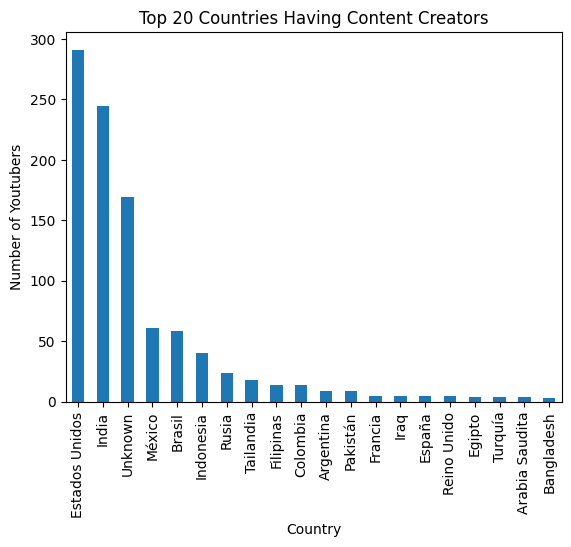

In [14]:
yt_country.plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Number of Youtubers")
plt.title("Top 20 Countries Having Content Creators")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

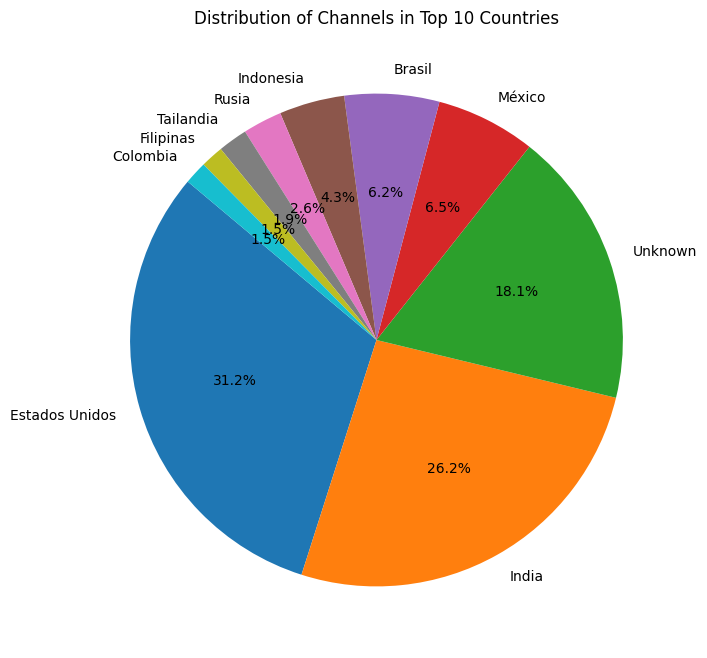

In [15]:
top_countries = df['Country'].value_counts().head(10)  # Top 10 countries
plt.figure(figsize=(10, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Channels in Top 10 Countries")
plt.show

In [16]:
total_categories = df['Categories'].value_counts()
total_categories.head(15)

Unknown                      324
Música y baile               152
Películas, Animación          60
Animación, Videojuegos        37
Vlogs diarios                 37
Música y baile, Películas     37
Películas, Humor              37
Noticias y Política           35
Animación, Humor              30
Animación, Juguetes           26
Educación                     22
Películas                     21
Animación                     20
Videojuegos, Humor            18
Videojuegos                   17
Name: Categories, dtype: int64

In [17]:
categories = df['Categories'].unique()
print("Categories in the dataset:")
print(categories)

Categories in the dataset:
['Música y baile' 'Videojuegos, Humor' 'Educación' 'Unknown'
 'Animación, Juguetes' 'Películas, Videojuegos' 'Juguetes' 'Videojuegos'
 'Películas, Animación' 'Películas' 'Noticias y Política'
 'Animación, Humor' 'Películas, Humor' 'Películas, Juguetes'
 'Música y baile, Películas' 'Música y baile, Animación' 'Vlogs diarios'
 'Videojuegos, Juguetes' 'Animación, Videojuegos' 'Música y baile, Humor'
 'Animación' 'Ciencia y tecnología' 'Fitness, Salud y autoayuda'
 'Belleza, Moda' 'Humor' 'Diseño/arte' 'Comida y bebida'
 'Viajes, Espectáculos' 'Deportes' 'Fitness'
 'Comida y bebida, Salud y autoayuda' 'Salud y autoayuda'
 'DIY y Life Hacks, Juguetes' 'AnimaciónHumorEducación'
 'Educación, Juguetes' 'Música y baile, Juguetes'
 'Juguetes, Coches y vehículos' 'Animales y mascotas' 'Belleza' 'ASMR'
 'Moda' 'DIY y Life Hacks' 'Diseño/arte, Belleza' 'Coches y vehículos'
 'Animación, Humor, Juguetes' 'Misterio' 'ASMR, Comida y bebida'
 'Comida y bebida, Juguetes']


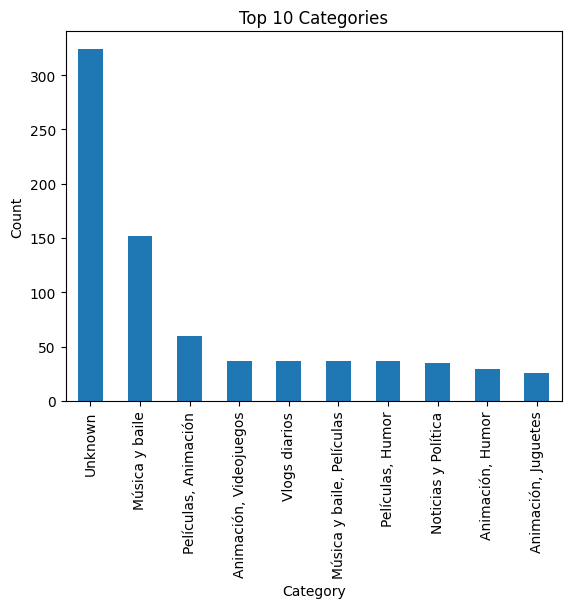

In [18]:
categories = df['Categories'].value_counts().head(10)
categories.plot(kind = 'bar')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Top 10 Categories")
plt.show()

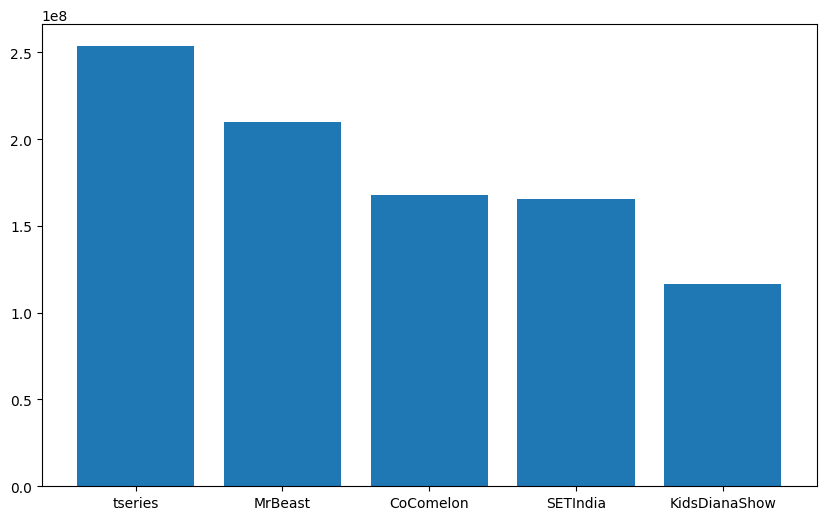

In [19]:
Suscribers = df.head(5)
plt.figure(figsize=(10,6))
plt.bar(Suscribers['Username'],Suscribers['Suscribers'])
plt.xlabel='Suscribers'
plt.ylabel='Youtuber'
plt.title='Top 5 Youtube Suscribers'
plt.show()

In [20]:
df1 = df.drop(['Visits','Comments','Links'], axis = 'columns')[:20]
df1

,Rank,Username,Categories,Suscribers,Country,Likes
0,1.0,tseries,Música y baile,253500000.0,India,3200.0
1,2.0,MrBeast,"Videojuegos, Humor",210100000.0,Estados Unidos,5400000.0
2,3.0,CoComelon,Educación,168100000.0,Unknown,21600.0
3,4.0,SETIndia,Unknown,165400000.0,India,239.0
4,5.0,KidsDianaShow,"Animación, Juguetes",116500000.0,Unknown,8800.0
5,NaN,PewDiePie,"Películas, Videojuegos",111400000.0,Estados Unidos,182000.0
6,7.0,LikeNastyaofficial,Juguetes,110400000.0,Unknown,14500.0
7,8.0,VladandNiki,"Animación, Juguetes",105500000.0,Unknown,17300.0
8,9.0,zeemusiccompany,Música y baile,102600000.0,India,1800.0
9,10.0,WWE,Videojuegos,98100000.0,Estados Unidos,4600.0


In [21]:
data = px.bar(df1, x="Username", y="Suscribers", color="Username", title="Analysis of top 20 YouTubers from all over the World on the basis of Subscribers")
data.show()

In [22]:
data2 = px.bar(df1, x="Username", y="Likes", color="Username", title="Analysis of top 20 YouTubers from all over the World on the basis of Likes")
data2.show()

In [23]:
df2 = df1[df1['Country' ] == "India"]
df2

,Rank,Username,Categories,Suscribers,Country,Likes
0,1.0,tseries,Música y baile,253500000.0,India,3200.0
3,4.0,SETIndia,Unknown,165400000.0,India,239.0
8,9.0,zeemusiccompany,Música y baile,102600000.0,India,1800.0
11,12.0,GoldminesTelefilms,Unknown,92100000.0,India,261.0
12,13.0,SonySAB,"Películas, Animación",87200000.0,India,562.0
13,14.0,5MinuteCraftsYouTube,Películas,80500000.0,India,574.0
14,NaN,BTS,Música y baile,77000000.0,India,166600.0
15,16.0,zeetv,Unknown,74700000.0,India,134.0
19,20.0,colorstv,Unknown,68700000.0,India,206.0


In [24]:
data3 = px.bar(df2, x="Username", y="Suscribers", color="Username", title="Analysis of YouTubers in India who comes under top 20")
data3.show()

In [25]:
data4 = df1[["Country", "Categories", "Suscribers", "Username"]]

fig = px.sunburst(data4, path=['Country','Categories', 'Username'], values='Suscribers',
                  title= 'YouTubers on the basis of their Country, Categories and Username', height=650)
fig.show()

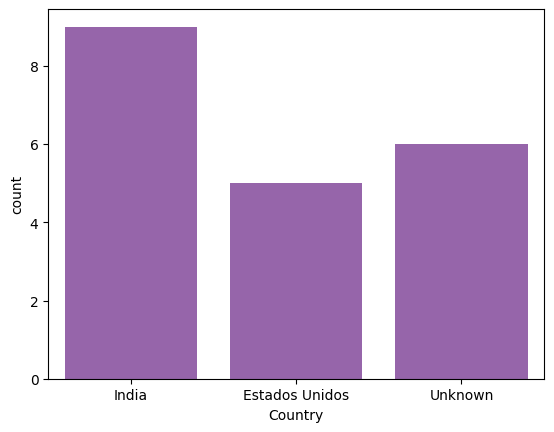

In [26]:
sns.countplot(x='Country',data=df1,color='#9b59b6')
plt.show()

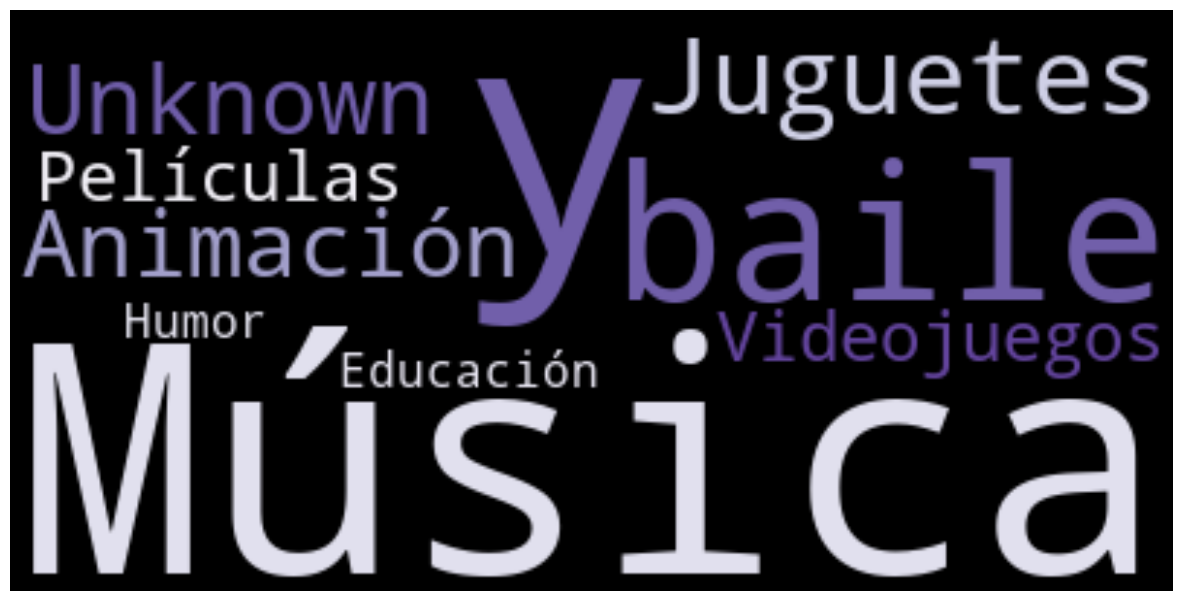

In [27]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
text = " ".join(i for i in df1.Categories)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, colormap="Purples").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TypeError: 'str' object is not callable

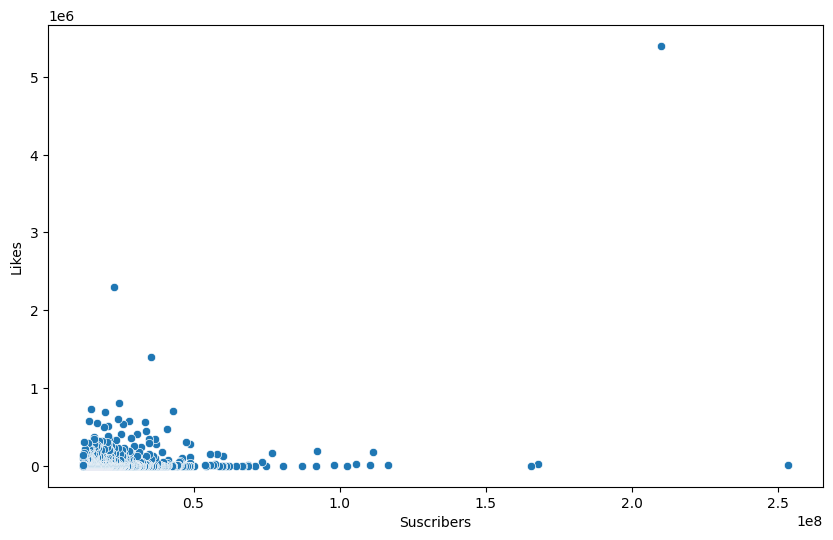

In [28]:
# Scatter Plot of Subscribers vs Likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Suscribers', y='Likes', data=df)
plt.xlabel('Subscribers')
plt.ylabel('Likes')
plt.show()